<a href="https://colab.research.google.com/github/dimi-fn/Google-Playstore-Apps/blob/master/Google_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
app = pd.read_csv('/content/Google-Playstore-32K.csv') 

In [5]:
app.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034.0,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922.0,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device
2,Peapod,SHOPPING,3.656329393,1967.0,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154.0,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291.0,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device


In [6]:
app.shape

(32000, 11)

In [7]:
# Number of app categories
app["Category"].nunique()

52

In [8]:
# The app categories
app.Category.unique()

array(['FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'LIFESTYLE',
       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_RACING', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY',
       'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO',
       'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION',
       'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'GAME_WORD', 'ART_AND_DESIGN',
       'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'SOCIAL',
       'BEAUTY', 'GAME_CASINO', 'MAPS_AND_NAVIGATION', 'PERSONALIZATION',
       'GAME_CARD', 'TOOLS', 'SPORTS', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'COMICS', 'PARENTING', 'DATING', 'WEATHER',
       'MEDICAL', ' Podcasts', ')', ' Channel 2 News'], dtype=object)

In [9]:
# Viewing the number of classes (gradation) of the number of installations
app["Installs"].nunique()

24

In [10]:
app.Installs.unique()

array(['5,000,000+', '100,000,000+', '100,000+', '10,000,000+', '10,000+',
       '1,000,000+', '50,000,000+', '500,000+', '50,000+', '5,000+',
       '1,000+', '500,000,000+', '1,000,000,000+', '5,000,000,000+',
       '100+', '500+', '50+', '5+', '10+', '1+', 'EDUCATION', '6',
       '11976', '0+'], dtype=object)

In [11]:
# There are a lot of app sizes
app["Size"].nunique()

579

In [12]:
# Viewing the content rating; who is permitted to download these apps
app["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', '100,000+', 'Unrated', '$0.99', '0'],
      dtype=object)

In [13]:
# the number of categories of the age content rating
len(app["Content Rating"].unique())

9

In [14]:
app.isnull().sum()

App Name           0
Category           0
Rating             0
Reviews            1
Installs           0
Size               0
Price              0
Content Rating     0
Last Updated       0
Minimum Version    0
Latest Version     1
dtype: int64

In [15]:
# There are totally 11 empty data entries which will be dropped
len(app.isnull().sum())

11

In [16]:
# Dropping the entries where there are missing values
app=app.dropna()

In [17]:
app.isnull().any()
# False for every category means that there are no longer missing values

App Name           False
Category           False
Rating             False
Reviews            False
Installs           False
Size               False
Price              False
Content Rating     False
Last Updated       False
Minimum Version    False
Latest Version     False
dtype: bool

In [18]:
# Ensuring there are no missing values in any column, in any data of every column
app.isnull().any().any()

False

# Cleaning of the Data - Exploring and Managing the Data

In [19]:
# Start of cleaning
# There were given some commands to locate any invalid data
# I noticed that are some misplacing, e.g. here, "4" should move to "Rating", and "GAME_STRATEGY" should move to "Category"

# Wherever the data are misplaced but valid, the data will be kept and edited (correcting the entry positions)
# Wherever the data are misplaced and invalid too (with lot's of mistakes), the data will be removed

app[app["Rating"]== "GAME_STRATEGY"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
13504,Never have I ever 18+,),GAME_STRATEGY,4.0,6,100+,2.4M,$0.99,Mature 17+,"December 30, 2018",4.0.3 and up


In [20]:
# dropping the invalid entry

app.drop(index=13504, inplace=True)  

In [21]:
# Now the column "Rating" is fixed

app[app["Rating"]== "GAME_STRATEGY"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [22]:
# Noticing the same pattern. Wrong entry data in the columns

app[app["Rating"]== "NEWS_AND_MAGAZINES"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
23457,Israel News,Channel 2 News,NEWS_AND_MAGAZINES,3.857799,11976,"1,000,000+",Varies with device,0,Everyone 10+,"March 16, 2019",Varies with device


In [23]:
# Here the data are misplaced but valid

# I am manually fixing the misplacing data values

app.loc[23457, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "NEWS_AND_MAGAZINES", "3.857798815", "11976", "1,000,000+", "Varies with device", "0", "Everyone 10+", "March 16, 2019", "Varies with device", "NaN" 

In [24]:
app.loc[23457]

App Name                  Israel News
Category           NEWS_AND_MAGAZINES
Rating                    3.857798815
Reviews                         11976
Installs                   1,000,000+
Size               Varies with device
Price                               0
Content Rating           Everyone 10+
Last Updated           March 16, 2019
Minimum Version    Varies with device
Latest Version                    NaN
Name: 23457, dtype: object

In [25]:
app.loc[48438, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "NEWS_AND_MAGAZINES", "4.775640965", "156", "10,000+", "6.9M", "0", "Teen", "March 30, 2019","4.1 and up", "NaN" 

In [26]:
app.loc[48438]

App Name                          NaN
Category           NEWS_AND_MAGAZINES
Rating                    4.775640965
Reviews                           156
Installs                      10,000+
Size                             6.9M
Price                               0
Content Rating                   Teen
Last Updated           March 30, 2019
Minimum Version            4.1 and up
Latest Version                    NaN
Name: 48438, dtype: object

In [27]:
# Here is an example of misplaced data with a lot of mistakes. It does not seem important to be fixed, it will be dropped

app[app["Rating"]== "ENTERTAINMENT"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [28]:
# Ensuring that there are no longer wrong entries in the column "Rating"

app[app["Rating"]== "ENTERTAINMENT"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [29]:
app[app["Rating"]== "EDUCATION"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [30]:
# Dropping these data entries which do not seem important and they have a lot of mistakes
app[app["Rating"]== "EDUCATION"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [31]:
# In this line respecting the column "Rating" there are misplaced but valid data

# Data will be fixed manually, putting them in the correct position

app[app["Rating"]== "SOCIAL"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [32]:
# Fixing the data entry positions manually

app.loc[165230, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "SOCIAL", "4.098591328", "71", "5,000+", "7.7M", "0", "Everyone", "March 30, 2019","4.1 and up", "NaN" 

In [33]:
app[app["Rating"]== "SOCIAL"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [34]:
app[app["Rating"]== "PRODUCTIVITY"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [35]:
# Fixing the data entry positions manually for the index position 168914

app.loc[168914, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "PRODUCTIVITY", "4.389830589", "59", "10,000+", "16M", "0", "Everyone", "December 21, 2018","4.1 and up", "NaN"
app[app["Rating"]== "PRODUCTIVITY"] # Ensuring that column "Rating" is fixed from this kind of data entry

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [36]:
app[app["Rating"]== "MUSIC_AND_AUDIO"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [37]:
# Same logic here. Misplaced but valid data. They will be edited manually

app.loc[177165, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "MUSIC_AND_AUDIO", "4.538461685", "13", "1,000+", "Varies with device", "0", "Teen", "October 24, 2018","Varies with device", "NaN"
app.loc[193869, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "MUSIC_AND_AUDIO", "4.632093906", "511", "10,000+", "2.5M", "0", "Everyone", "September 25, 2018","2.3 and up", "NaN"
app.loc[257773, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "MUSIC_AND_AUDIO", "4.400000095", "10", "1,000+", "3.5M", "0", "Everyone", "November 7, 2018","4.0 and up", "NaN"
app[app["Rating"]== "PRODUCTIVITY"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [38]:
app[app["Rating"]== "TRAVEL_AND_LOCAL"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [39]:
# Fixing the entries in index position 190759 manually (misplaced but substantial values)

app.loc[190759, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "TRAVEL_AND_LOCAL", "5", "6", "1,000+", "27M", "0", "Everyone", "October 16, 2017", "4.0 and up", "NaN"

app[app["Rating"]== "TRAVEL_AND_LOCAL"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [40]:
app[app["Rating"]== "LIFESTYLE"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [41]:
# same logic as previously

app.loc[194165, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = "LIFESTYLE", "4.388349533", "927", "100,000+", "3.7M", "0", "Everyone", "May 23, 2018", "4.0 and up", "NaN"
app[app["Rating"]== "LIFESTYLE"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [42]:
app[app["Rating"]== " Economics"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [43]:
# Applying the same logic. Correting the misplaced (but valid) data

app.loc[232811, ["Category", "Rating", "Reviews", "Installs", "Size", "Price", "Content Rating", "Last Updated", "Minimum Version", "Latest Version"]] = " Economics", "4.823529243", "17", "1,000+", "17M", "0", "Everyone", "October 22, 2018", "NaN", "NaN"
app[app["Rating"]== " Economics"]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [44]:
# Here we had an entry in column "Rating" which was 7. But we want "Rating<=5". 
# It was fixed so now there is no longer rating with numbers more than "5"

app[app["Rating"]==7.000000]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [45]:

app[app["Rating"]==7.000000]

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version


In [46]:
# Converting the column "Rating" to float so that we can apply statistics 

app.Rating= app.Rating.astype(float) 

In [47]:
app.describe()

,Rating
count,32006.000000
mean,4.271294
std,0.499612
min,1.000000
25%,4.090909
50%,4.375006
75%,4.583333
max,5.000000


In [48]:
# Converting the data in the column "Reviews" to float to that we can apply statistics

app.Reviews= app.Reviews.astype(float) 

In [49]:
app.describe()

,Rating,Reviews
count,32006.000000,3.200600e+04
mean,4.271294,9.846959e+04
std,0.499612,1.173584e+06
min,1.000000,1.000000e+00
25%,4.090909,1.390000e+02
50%,4.375006,1.463000e+03
75%,4.583333,1.442900e+04
max,5.000000,8.621429e+07


In [50]:
# I want to convert the column "Installs" into float

# I firstly have to remove the "+"
 
app.Installs= app["Installs"].str.replace("+", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [51]:
# I had some problems converting the column into float, even when i removed "+"

# I am removing the commas

app.Installs= app["Installs"].str.replace(",", "")

In [52]:
app["Installs"] = pd.to_numeric(app["Installs"])

In [53]:
# Removing "$" from the data entries in the column "Price" so that it can be converted to float

app["Price"]= app["Price"].str.replace("$", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# Convert the data in "Price" to float


app["Price"]= app.Price.astype(float)

In [55]:
# the data in the column "Prics" successfully converted to float

# In these columns i can do various statistical applications
app.describe()

,Rating,Reviews,Installs,Price
count,32006.000000,3.200600e+04,3.200600e+04,32006.000000
mean,4.271294,9.846959e+04,4.125424e+06,0.290077
std,0.499612,1.173584e+06,5.871178e+07,3.320007
min,1.000000,1.000000e+00,0.000000e+00,0.000000
25%,4.090909,1.390000e+02,1.000000e+04,0.000000
50%,4.375006,1.463000e+03,1.000000e+05,0.000000
75%,4.583333,1.442900e+04,1.000000e+06,0.000000
max,5.000000,8.621429e+07,5.000000e+09,399.990000


In [56]:
# procedure for converting the column "Size" to float
# there are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"
app.Size.unique()

array(['Varies with device', '1.4M', '16M', '23M', '4.1M', '39M', '8.1M',
       '19M', '30M', '11M', '14M', '38M', '15M', '55M', '7.8M', '17M',
       '62M', '22M', '25M', '46M', '9.5M', '78M', '13M', '72M', '81M',
       '44M', '24M', '99M', '37M', '63M', '45M', '20M', '34M', '79M',
       '35M', '36M', '54M', '40M', '90M', '97M', '27M', '82M', '58M',
       '43M', '64M', '47M', '50M', '33M', '84M', '89M', '69M', '52M',
       '101M', '71M', '66M', '12M', '18M', '56M', '9.3M', '3.4M', '48M',
       '31M', '51M', '49M', '21M', '4.8M', '4.7M', '26M', '32M', '2.9M',
       '9.4M', '10M', '76M', '93M', '3.0M', '41M', '29M', '42M', '94M',
       '75M', '4.0M', '73M', '2.4M', '7.7M', '9.7M', '6.6M', '2.7M',
       '57M', '59M', '8.4M', '8.6M', '70M', '6.1M', '8.3M', '2.0M',
       '7.0M', '2.5M', '28M', '6.9M', '7.1M', '5.7M', '4.4M', '686k',
       '4.3M', '4.2M', '3.6M', '8.7M', '3.3M', '7.3M', '10.0M', '7.6M',
       '1.7M', '98M', '4.5M', '6.5M', '65M', '6.2M', '80M', '85M', '86M',
   

In [57]:
# removing the "m" which is the mb for the size

app.Size= app["Size"].str.replace("M", "")

In [58]:
# assigning "Varies with device" with a number like "-1" so that i can seperate it later

# app.Size= app["Size"].str.replace("Varies with device", "-1")

In [59]:
# Segmenting the column of the size

y= app.iloc[:, 5:6]


In [60]:
# I tried to fix the last problems in converting the column "Size" to float
# Here i am trying to remove "k" (kbs) and the blanks, and to convert kbs to mbs
# It keeps giving me errors and i cannot fix it
# i will not use the column "Size" for statistical applications

#for x in y:
#    x = str(x)
#    x= x.replace(" ", "")
#    x= x.replace(",", ".")
#    if "k" in x:
#        x= x.replace("k", "")
#        x=x.replace(" k", "")
#        x=x.replace("k ", "")
#        x= float(x)
#        x= x/1024

In [61]:
# There are 11,728 apps whose size varies with device

len(app[app["Size"]== "Varies with device"])

3197

In [62]:
app.Size.describe()

count                  32006
unique                   576
top       Varies with device
freq                    3197
Name: Size, dtype: object

In [63]:
print ("Apps whose size varies with device are {}% of the dataset".format(11728/267040*100))

Apps whose size varies with device are 4.391851408028759% of the dataset


# Statistical Analysis

In [64]:
#ensuring the shape of dataframe before proceeding to further statistics and visualization

app.shape

(32006, 11)

In [65]:
# the columns, the data of which we can do statistic manipulation

app.describe()

,Rating,Reviews,Installs,Price
count,32006.000000,3.200600e+04,3.200600e+04,32006.000000
mean,4.271294,9.846959e+04,4.125424e+06,0.290077
std,0.499612,1.173584e+06,5.871178e+07,3.320007
min,1.000000,1.000000e+00,0.000000e+00,0.000000
25%,4.090909,1.390000e+02,1.000000e+04,0.000000
50%,4.375006,1.463000e+03,1.000000e+05,0.000000
75%,4.583333,1.442900e+04,1.000000e+06,0.000000
max,5.000000,8.621429e+07,5.000000e+09,399.990000


In [66]:
app.info() # data type for each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32006 entries, 0 to 232811
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         31997 non-null  object 
 1   Category         32006 non-null  object 
 2   Rating           32006 non-null  float64
 3   Reviews          32006 non-null  float64
 4   Installs         32006 non-null  int64  
 5   Size             32006 non-null  object 
 6   Price            32006 non-null  float64
 7   Content Rating   32006 non-null  object 
 8   Last Updated     32006 non-null  object 
 9   Minimum Version  32006 non-null  object 
 10  Latest Version   32006 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.9+ MB


In [67]:
#reinsuring there are no any missing values
app.isnull().any().any()

True

In [68]:
#******************************************************************************************************
# Reviewing the unique values and the number of unique values in each column after the cleaning process

In [69]:
# Values in "Category"
app["Category"].unique()

array(['FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'LIFESTYLE',
       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_RACING', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY',
       'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO',
       'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION',
       'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'GAME_WORD', 'ART_AND_DESIGN',
       'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'SOCIAL',
       'BEAUTY', 'GAME_CASINO', 'MAPS_AND_NAVIGATION', 'PERSONALIZATION',
       'GAME_CARD', 'TOOLS', 'SPORTS', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'COMICS', 'PARENTING', 'DATING', 'WEATHER',
       'MEDICAL', ' Economics'], dtype=object)

In [70]:
# There are 51 different categories

app["Category"].nunique()

50

In [71]:
# Unique values of Rating
app["Rating"].unique()

array([4.54856157, 4.40067148, 3.65632939, ..., 4.77564097, 4.63209391,
       4.38834953])

In [72]:
# There are 99,845 unique values of Rating

app["Rating"].nunique()

25435

In [73]:
# Unique values of the column "Reviews"
app["Reviews"].unique()

array([ 305034., 1207922.,    1967., ...,   11214.,   14039.,    1796.])

In [74]:
# There are 24,531 different reviews

app["Reviews"].nunique()

14533

In [75]:
# Unique values of installations

app["Installs"].unique()

array([   5000000,  100000000,     100000,   10000000,      10000,
          1000000,   50000000,     500000,      50000,       5000,
             1000,  500000000, 1000000000, 5000000000,        100,
              500,         50,          5,         10,          1,
                0])

In [76]:
# There are 21 different classes of installations

app["Installs"].nunique()

21

In [77]:
# Unique values in the column "Size"
app["Size"].unique()

array(['Varies with device', '1.4', '16', '23', '4.1', '39', '8.1', '19',
       '30', '11', '14', '38', '15', '55', '7.8', '17', '62', '22', '25',
       '46', '9.5', '78', '13', '72', '81', '44', '24', '99', '37', '63',
       '45', '20', '34', '79', '35', '36', '54', '40', '90', '97', '27',
       '82', '58', '43', '64', '47', '50', '33', '84', '89', '69', '52',
       '101', '71', '66', '12', '18', '56', '9.3', '3.4', '48', '31',
       '51', '49', '21', '4.8', '4.7', '26', '32', '2.9', '9.4', '10',
       '76', '93', '3.0', '41', '29', '42', '94', '75', '4.0', '73',
       '2.4', '7.7', '9.7', '6.6', '2.7', '57', '59', '8.4', '8.6', '70',
       '6.1', '8.3', '2.0', '7.0', '2.5', '28', '6.9', '7.1', '5.7',
       '4.4', '686k', '4.3', '4.2', '3.6', '8.7', '3.3', '7.3', '10.0',
       '7.6', '1.7', '98', '4.5', '6.5', '65', '6.2', '80', '85', '86',
       '9.1', '68', '2.6', '87', '88', '9.2', '74', '4.6', '103', '96',
       '5.2', '116', '6.3', '91', '111', '83', '53', '431k', '3

In [78]:
# There are 1,236 different sizes for the apps

app["Size"].nunique()

576

In [79]:
# There are 488 different prices 
app["Price"].nunique()

102

In [80]:
# Unique values of the column "Content Rating"
app["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [81]:
# There are 6 different content ratings

len(app["Content Rating"].unique())

6

In [82]:
print("***************************************************")

print("Minimum number of ratings: %.2f" %app["Rating"].min())
print("Maximum number of ratings: %.2f" %app["Rating"].max())

print("***************************************************")

print("Minimum number of reviews: %.2f" %app["Reviews"].min())
print("Maximum number of reviews: %.2f" %app["Reviews"].max())

print("***************************************************")

print("Minimum number of installs: %.2f" %app["Installs"].min())
print("Maximum number of installs: %.2f" %app["Installs"].max())

print("***************************************************")


print("Minimum number of prices: %.2f" %app["Price"].min())
print("Maximum number of prices: %.2f" %app["Price"].max())

print("***************************************************")



***************************************************
Minimum number of ratings: 1.00
Maximum number of ratings: 5.00
***************************************************
Minimum number of reviews: 1.00
Maximum number of reviews: 86214292.00
***************************************************
Minimum number of installs: 0.00
Maximum number of installs: 5000000000.00
***************************************************
Minimum number of prices: 0.00
Maximum number of prices: 399.99
***************************************************


In [83]:
# Getting the measures of central tendency for all the installation grouped by "Category"

app.groupby("Category").Installs.agg(["min", "mean", "median", "max"])

,min,mean,median,max
Category,,,,
Economics,1000,1.000000e+03,1000.0,1000
ART_AND_DESIGN,50,1.182970e+06,50000.0,100000000
AUTO_AND_VEHICLES,10,8.967374e+05,100000.0,10000000
BEAUTY,10,6.078851e+05,100000.0,10000000
BOOKS_AND_REFERENCE,1,8.014129e+05,100000.0,100000000
BUSINESS,1,1.133754e+06,50000.0,100000000
COMICS,5,1.260967e+06,100000.0,10000000
COMMUNICATION,1,1.918647e+07,100000.0,1000000000
DATING,5,1.125081e+06,100000.0,10000000


In [84]:
# Sorting (descending sorting) the dataframe by number of installs

app.sort_values(by="Installs", ascending= False)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.00,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.00,Teen,"April 2, 2019",Varies with device,Varies with device
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.00,Everyone,"April 1, 2019",Varies with device,Varies with device
6412,Google Play Movies & TV,VIDEO_PLAYERS,3.703356,1048972.0,1000000000,Varies with device,0.00,Teen,"April 1, 2019",Varies with device,Varies with device
842,Google Chrome: Fast & Secure,COMMUNICATION,4.335205,13636591.0,1000000000,Varies with device,0.00,Everyone,"March 26, 2019",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
25708,Magic Room,ENTERTAINMENT,5.000000,1.0,1,27,0.99,Everyone,"March 6, 2019",5.0 and up,1.9
3035,Google Camera,PHOTOGRAPHY,3.997701,401547.0,1,Varies with device,0.00,Everyone,"March 26, 2019",Varies with device,Varies with device
3987,APOJUC Associa��o de Pastores e Obreiros de J...,COMMUNICATION,5.000000,1.0,1,8.9,0.00,Everyone,"March 16, 2019",4.1 and up,1
23720,Bubble Shooter,GAME_PUZZLE,4.130435,23.0,0,19,0.00,Everyone,"October 23, 2018",4.0 and up,1.0.0


In [85]:
top_installed_apps=app.sort_values(by="Installs", ascending= False)

In [86]:
#*************************************************************

# top 10 apps based on the number of installations

#*************************************************************

top_installed_apps.head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
6412,Google Play Movies & TV,VIDEO_PLAYERS,3.703356,1048972.0,1000000000,Varies with device,0.0,Teen,"April 1, 2019",Varies with device,Varies with device
842,Google Chrome: Fast & Secure,COMMUNICATION,4.335205,13636591.0,1000000000,Varies with device,0.0,Everyone,"March 26, 2019",Varies with device,Varies with device
1259,Google Photos,PHOTOGRAPHY,4.542380,16278468.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
831,Facebook Lite,SOCIAL,4.288809,10866006.0,1000000000,Varies with device,0.0,Teen,"March 28, 2019",Varies with device,Varies with device
28676,Samsung Print Service Plugin,PRODUCTIVITY,4.204499,322275.0,1000000000,Varies with device,0.0,Everyone,"October 5, 2018",4.4 and up,Varies with device
3269,SHAREit - Transfer & Share,TOOLS,4.579340,10450444.0,1000000000,20,0.0,Everyone,"April 1, 2019",4.1 and up,4.7.38_ww
3267,Samsung Internet Browser,COMMUNICATION,4.424015,832714.0,1000000000,Varies with device,0.0,Everyone,"February 21, 2019",5.0 and up,Varies with device


In [87]:
# Apps with 5 billion installations (5b is the 1st greater class of installations in the dataset)

len(app[app["Installs"]>= 5000000000])

3

In [88]:
# Apps with more than 1 billion installations (1b is the 2nd greater class of installations in the dataset)

len(app[app["Installs"]>= 1000000000])

27

In [89]:
top_installed_and_rated_apps = app.sort_values(by=["Installs", "Rating"], ascending=False)
top_installed_and_rated_apps # main top apps

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.00,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.00,Teen,"April 2, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.00,Everyone,"April 1, 2019",Varies with device,Varies with device
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.00,Everyone,"April 1, 2019",Varies with device,7.0.6
6411,Google Duo - High Quality Video Calls,COMMUNICATION,4.596404,3641252.0,1000000000,20,0.00,Everyone,"April 2, 2019",4.4 and up,50.1.240885383.DR50_RC06
...,...,...,...,...,...,...,...,...,...,...,...
3035,Google Camera,PHOTOGRAPHY,3.997701,401547.0,1,Varies with device,0.00,Everyone,"March 26, 2019",Varies with device,Varies with device
30568,Display Power Saver Premium,TOOLS,3.000000,1.0,1,2.0,0.99,Everyone,"February 21, 2019",4.1 and up,2.8 (paid)
5186,Wa Thema Transparan Black&Pink new Tips 2019,BOOKS_AND_REFERENCE,1.000000,1.0,1,4.8,0.00,Everyone,"February 26, 2019",4.4 and up,1
24784,DUA KE QURAN AMHARIC,EDUCATION,4.730337,89.0,0,7.9,0.00,Everyone,"May 10, 2018",4.4 and up,1


In [90]:
#**************************************************************************
# top 10 apps based on the number of installations and rating together (main top apps)
#**************************************************************************

top_installed_and_rated_apps.head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.0,Everyone,"April 1, 2019",Varies with device,7.0.6
6411,Google Duo - High Quality Video Calls,COMMUNICATION,4.596404,3641252.0,1000000000,20,0.0,Everyone,"April 2, 2019",4.4 and up,50.1.240885383.DR50_RC06
3269,SHAREit - Transfer & Share,TOOLS,4.579340,10450444.0,1000000000,20,0.0,Everyone,"April 1, 2019",4.1 and up,4.7.38_ww
1259,Google Photos,PHOTOGRAPHY,4.542380,16278468.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85,0.0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0
3267,Samsung Internet Browser,COMMUNICATION,4.424015,832714.0,1000000000,Varies with device,0.0,Everyone,"February 21, 2019",5.0 and up,Varies with device


In [91]:
top_installed_and_reviewed_apps = app.sort_values(by=["Installs", "Reviews"], ascending=False)
top_installed_and_reviewed_apps

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.00,Teen,"April 2, 2019",Varies with device,Varies with device
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.00,Everyone,"April 1, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.00,Everyone,"April 1, 2019",Varies with device,Varies with device
671,WhatsApp Messenger,COMMUNICATION,4.417610,86214292.0,1000000000,Varies with device,0.00,Everyone,"March 27, 2019",Varies with device,Varies with device
704,Facebook,SOCIAL,4.087946,85766433.0,1000000000,Varies with device,0.00,Teen,"April 2, 2019",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...
27321,Frescafe,FOOD_AND_DRINK,5.000000,1.0,1,7.2,0.00,Everyone,"February 27, 2019",4.4 and up,1.13.1
28435,Reel Quotes - Question-a-Day Movie Trivia,GAME_TRIVIA,5.000000,1.0,1,4.3,0.00,Everyone,"March 1, 2019",4.3 and up,1.02
30568,Display Power Saver Premium,TOOLS,3.000000,1.0,1,2.0,0.99,Everyone,"February 21, 2019",4.1 and up,2.8 (paid)
24784,DUA KE QURAN AMHARIC,EDUCATION,4.730337,89.0,0,7.9,0.00,Everyone,"May 10, 2018",4.4 and up,1


In [92]:
#**************************************************************************
# top 10 apps based on the number of installations and reviews together
#**************************************************************************

top_installed_and_reviewed_apps.head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
671,WhatsApp Messenger,COMMUNICATION,4.417610,86214292.0,1000000000,Varies with device,0.0,Everyone,"March 27, 2019",Varies with device,Varies with device
704,Facebook,SOCIAL,4.087946,85766433.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
632,Messenger � Text and Video Chat for Free,COMMUNICATION,4.085856,65469531.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.0,Everyone,"April 1, 2019",Varies with device,7.0.6
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85,0.0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0
1259,Google Photos,PHOTOGRAPHY,4.542380,16278468.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device


In [93]:
top_10_installed_and_rated_apps= top_installed_and_rated_apps.head(10)

In [94]:
top_10_installed_and_rated_apps.Category.sort_values(ascending=False)

813        VIDEO_PLAYERS
2177    TRAVEL_AND_LOCAL
821                TOOLS
7064               TOOLS
3269               TOOLS
653               SOCIAL
1259         PHOTOGRAPHY
539          GAME_ARCADE
6411       COMMUNICATION
3267       COMMUNICATION
Name: Category, dtype: object

In [95]:
# There are totally 244,396 apps
app["App Name"].nunique()

30842

In [96]:
# here i will see the number of apps which belong to the categories of the most installed and rated apps


count_VIDEO_PLAYERS=0
count_TRAVEL_AND_LOCAL=0
count_TOOLS=0
count_SOCIAL=0
count_PHOTOGRAPHY=0
count_GAME_ARCADE=0
count_COMMUNICATION=0

for x in app["Category"]:
    if x== "VIDEO_PLAYERS":
        count_VIDEO_PLAYERS=count_VIDEO_PLAYERS+1
    elif x== "TRAVEL_AND_LOCAL":
        count_TRAVEL_AND_LOCAL= count_TRAVEL_AND_LOCAL+1
    elif x== "TOOLS":
        count_TOOLS= count_TOOLS+1
    elif x== "SOCIAL":
        count_SOCIAL= count_SOCIAL+1
    elif x== "PHOTOGRAPHY":
        count_PHOTOGRAPHY= count_PHOTOGRAPHY+1
    elif x== "GAME_ARCADE":
        count_GAME_ARCADE= count_GAME_ARCADE+1
    elif x== "COMMUNICATION":
        count_COMMUNICATION= count_COMMUNICATION+1
print ("*****************************************************************************************************")
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Video Players\" is: {}".format(count_VIDEO_PLAYERS))
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Travel and Local\" is: {}".format(count_TRAVEL_AND_LOCAL))
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Tools\" is: {}".format(count_TOOLS))
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Social\" is: {}".format(count_SOCIAL))
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Photography\" is: {}".format(count_PHOTOGRAPHY))
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Game Arcade\" is: {}".format(count_GAME_ARCADE))
print ("*****************************************************************************************************")
print ("Number of apps that belong in category: \"Communication\" is: {}".format(count_COMMUNICATION))
print ("*****************************************************************************************************")
print ("*****************************************************************************************************")


*****************************************************************************************************
*****************************************************************************************************
Number of apps that belong in category: "Video Players" is: 330
*****************************************************************************************************
Number of apps that belong in category: "Travel and Local" is: 723
*****************************************************************************************************
Number of apps that belong in category: "Tools" is: 2399
*****************************************************************************************************
Number of apps that belong in category: "Social" is: 432
*****************************************************************************************************
Number of apps that belong in category: "Photography" is: 663
*********************************************************************************

In [97]:
top_10_installed_and_rated_apps["Content Rating"].sort_values(ascending=False)

813             Teen
653             Teen
539     Everyone 10+
821         Everyone
2177        Everyone
7064        Everyone
6411        Everyone
3269        Everyone
1259        Everyone
3267        Everyone
Name: Content Rating, dtype: object

In [98]:
app["Content Rating"].nunique()

6

In [99]:
# There are totally 6 categories of content rating

# In the top 10 installed and rated apps, there are 3 different content ratings

# I will now see their performance in the whole dataset, along with the other 3 remaining content ratings in the whole dataset

count_Teen=0
count_Everyone_10 = 0
count_Everyone=0

count_Mature_17=0
count_Adults_only=0
count_Unrated=0


for x in app["Content Rating"]:
    if x== "Teen":
        count_Teen= count_Teen+1
    elif x== "Everyone 10+":
        count_Everyone_10= count_Everyone_10+1
    elif x== "Everyone":
        count_Everyone= count_Everyone+1
    elif x== "Mature 17+":
        count_Mature_17 = count_Mature_17+1
    elif x== "Adults only 18+":
        count_Adults_only= count_Adults_only+1
    elif x== "Unrated":
        count_Unrated= count_Unrated+1
print ("*****************************************************************************************************")
print ("Number of apps of all the dataset, having the content rating which belong the top apps:")
print ("*")
print ("*")
print ("Number of apps that belong to the content rating \"Teen\" is: {}".format(count_Teen))
print ("*****************************************************************************************************")
print ("Number of apps that belong to the content rating \"Everyone 10+\" is: {}".format(count_Everyone_10))
print ("*****************************************************************************************************")
print ("Number of apps that belong to the content rating \"Everyone\" is: {}".format(count_Everyone))
print ("*****************************************************************************************************")
print ("*****************************************************************************************************")
print ("#####################################################################################################")
print ("Number of apps having content rating not included in the top apps")
print ("*")
print ("*")
print ("Number of apps that belong to the content rating \"Mature 17+\" is: {}".format(count_Mature_17))
print ("Number of apps that belong to the content rating \"Adults only 18+\" is: {}".format(count_Adults_only))
print ("Number of apps that belong to the content rating \"Unrated\" is: {}".format(count_Unrated))



*****************************************************************************************************
Number of apps of all the dataset, having the content rating which belong the top apps:
*
*
Number of apps that belong to the content rating "Teen" is: 2862
*****************************************************************************************************
Number of apps that belong to the content rating "Everyone 10+" is: 1054
*****************************************************************************************************
Number of apps that belong to the content rating "Everyone" is: 27462
*****************************************************************************************************
*****************************************************************************************************
#####################################################################################################
Number of apps having content rating not included in the top apps
*
*
Number of apps tha

In [100]:
# The aforementioned can be found more easily with the below command

app["Content Rating"].value_counts(ascending=False)

Everyone           27462
Teen                2862
Everyone 10+        1054
Mature 17+           622
Adults only 18+        3
Unrated                3
Name: Content Rating, dtype: int64

In [101]:
# In this and in the next 2 commands, i will try to see if there is any correlation between installations, Rating and Reviews

top_10_installed_and_rated_apps

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.0,Everyone,"April 1, 2019",Varies with device,7.0.6
6411,Google Duo - High Quality Video Calls,COMMUNICATION,4.596404,3641252.0,1000000000,20,0.0,Everyone,"April 2, 2019",4.4 and up,50.1.240885383.DR50_RC06
3269,SHAREit - Transfer & Share,TOOLS,4.579340,10450444.0,1000000000,20,0.0,Everyone,"April 1, 2019",4.1 and up,4.7.38_ww
1259,Google Photos,PHOTOGRAPHY,4.542380,16278468.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85,0.0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0
3267,Samsung Internet Browser,COMMUNICATION,4.424015,832714.0,1000000000,Varies with device,0.0,Everyone,"February 21, 2019",5.0 and up,Varies with device


In [102]:
#****************************************************************************************************************
# It seems that none of the best rated apps belong to the top installed (filtered by rating too) apps
#****************************************************************************************************************
app.sort_values(by="Rating", ascending= False).head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
19171,Thyroid Nodule and Cancer Guide,HEALTH_AND_FITNESS,5.0,9.0,100,19,0.00,Everyone,"February 18, 2019",5.0 and up,1.05
23853,??????App,EDUCATION,5.0,1.0,100,16,0.00,Everyone,"October 26, 2018",4.1 and up,1.0.1
23748,I Love You HD Wallpapers,PERSONALIZATION,5.0,1.0,100,4.2,0.00,Everyone,"November 19, 2018",4.0 and up,1
10180,NAPCO,PRODUCTIVITY,5.0,7.0,1000,11,0.00,Everyone,"March 20, 2018",4.1 and up,1.0.1
23790,NEWMOOD.lt,SHOPPING,5.0,1.0,500,12,0.00,Everyone,"January 16, 2019",5.0 and up,1.1
23793,Jazz Tour Madrid,ENTERTAINMENT,5.0,8.0,1000,1.9,0.00,Everyone,"March 30, 2013",2.2 and up,1.3
10163,Il Coniugatore (sans pub),BOOKS_AND_REFERENCE,5.0,1.0,10,2.0,0.99,Everyone,"February 9, 2019",4.0 and up,1.12
23835,Amrut Organic,BUSINESS,5.0,3.0,50,3.8,0.00,Everyone,"September 19, 2018",4.4 and up,1.4
23838,E-commerce App - iTanic (Demo),BUSINESS,5.0,3.0,50,3.8,0.00,Everyone,"July 11, 2018",4.4 and up,1.0.3
10071,Postmates Order App,BUSINESS,5.0,1.0,10,10,0.00,Everyone,"March 29, 2019",6.0 and up,3.8.8


In [103]:
#****************************************************************************************************************

# Relationship between Reviews and main top apps

# It seems that Instagram, Clean Master - Antivirus, Youtube and Subway Surfers

# The above 4 apps belong to the top installed (filtered by rating too) and simultaneously to the top reviewed apps

# So there is correlation of 4 out of 10 apps respecting top installed-rated apps and top reviewed apps
#****************************************************************************************************************

app.sort_values(by="Reviews", ascending= False).head(10)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
671,WhatsApp Messenger,COMMUNICATION,4.417610,86214292.0,1000000000,Varies with device,0.0,Everyone,"March 27, 2019",Varies with device,Varies with device
704,Facebook,SOCIAL,4.087946,85766433.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
632,Messenger � Text and Video Chat for Free,COMMUNICATION,4.085856,65469531.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
628,Clash of Clans,GAME_STRATEGY,4.606215,48401470.0,500000000,103,0.0,Everyone 10+,"April 2, 2019",4.1 and up,11.446.11
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.0,Everyone,"April 1, 2019",Varies with device,7.0.6
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85,0.0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0
12638,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.652842,25532160.0,500000000,Varies with device,0.0,Everyone,"March 29, 2019",Varies with device,4.9.1
1542,Clash Royale,GAME_STRATEGY,4.545474,25449254.0,100000000,81,0.0,Everyone 10+,"February 13, 2019",4.1 and up,2.6.1


In [104]:
top_10_installed_and_rated_apps

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.0,Everyone,"April 1, 2019",Varies with device,7.0.6
6411,Google Duo - High Quality Video Calls,COMMUNICATION,4.596404,3641252.0,1000000000,20,0.0,Everyone,"April 2, 2019",4.4 and up,50.1.240885383.DR50_RC06
3269,SHAREit - Transfer & Share,TOOLS,4.579340,10450444.0,1000000000,20,0.0,Everyone,"April 1, 2019",4.1 and up,4.7.38_ww
1259,Google Photos,PHOTOGRAPHY,4.542380,16278468.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85,0.0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0
3267,Samsung Internet Browser,COMMUNICATION,4.424015,832714.0,1000000000,Varies with device,0.0,Everyone,"February 21, 2019",5.0 and up,Varies with device


In [105]:
# Prices of the apps

app["Price"].value_counts().sort_values(ascending=False).head(10)

0.00    29959
0.99      354
1.99      313
2.99      303
4.99      233
3.99      195
1.49       89
2.49       68
9.99       56
3.49       49
Name: Price, dtype: int64

In [106]:
app.Price.nunique()

102

# Visualising  Data

In [107]:
app.head(2)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000,Varies with device,0.0,Everyone,"March 29, 2019",Varies with device,Varies with device
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000,Varies with device,0.0,Everyone,"March 29, 2019",Varies with device,Varies with device


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

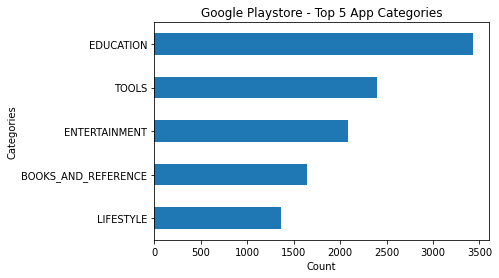

In [109]:
# Top 5 app Categories of all the dataset


app["Category"].value_counts().nlargest(5).sort_values(ascending=True).plot.barh()
plt.ylabel("Categories")
plt.xlabel("Count")
plt.title("Google Playstore - Top 5 App Categories")
plt.show()

In [110]:
app["Category"].value_counts().nlargest(5).sort_values(ascending=False)

EDUCATION              3431
TOOLS                  2399
ENTERTAINMENT          2084
BOOKS_AND_REFERENCE    1639
LIFESTYLE              1369
Name: Category, dtype: int64

In [111]:
# In which category do main 100 top apps belong

top_installed_and_rated_apps["Category"].head(100).value_counts()

PRODUCTIVITY           17
TOOLS                  15
COMMUNICATION          11
SOCIAL                  6
VIDEO_PLAYERS           5
NEWS_AND_MAGAZINES      4
PERSONALIZATION         4
GAME_ACTION             4
GAME_CASUAL             4
PHOTOGRAPHY             4
ENTERTAINMENT           3
GAME_RACING             3
TRAVEL_AND_LOCAL        3
MUSIC_AND_AUDIO         2
GAME_ARCADE             2
HEALTH_AND_FITNESS      2
SHOPPING                2
BOOKS_AND_REFERENCE     2
GAME_SPORTS             2
GAME_STRATEGY           1
EDUCATION               1
LIFESTYLE               1
GAME_SIMULATION         1
MAPS_AND_NAVIGATION     1
Name: Category, dtype: int64

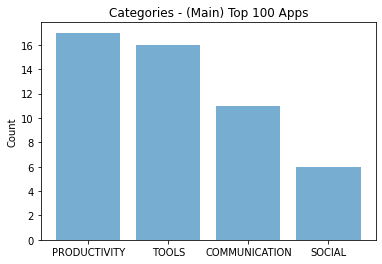

In [112]:
status= ("PRODUCTIVITY", "TOOLS", "COMMUNICATION", "SOCIAL")
y_pos= np.arange(len(status))
numbers= [17,16,11,6]
plt.bar(y_pos, numbers, align="center", alpha=0.6)
plt.xticks(y_pos, status)
plt.ylabel("Count")
plt.title("Categories - (Main) Top 100 Apps")
plt.show()

In [113]:
x=top_installed_and_rated_apps.head(100)

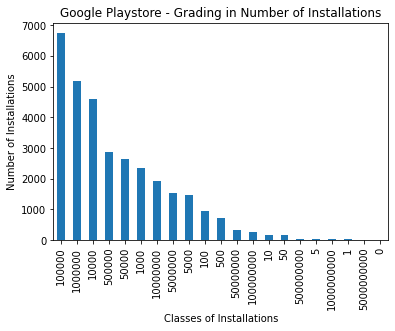

In [114]:
# Relationship betweeen: Classes and number of Installations


app["Installs"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Installations")
plt.xlabel("Classes of Installations")
plt.title("Google Playstore - Grading in Number of Installations")
plt.show()

In [115]:
# Top 5 Gradings in the number of installations

app["Installs"].value_counts().nlargest(5)

100000     6746
1000000    5194
10000      4593
500000     2863
50000      2642
Name: Installs, dtype: int64

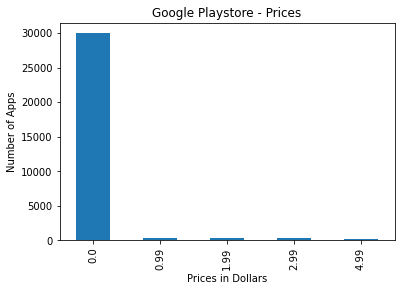

In [116]:
app["Price"].value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Prices in Dollars")
plt.title("Google Playstore - Prices")
plt.show()

In [117]:
app["Price"].value_counts().nlargest(5)

0.00    29959
0.99      354
1.99      313
2.99      303
4.99      233
Name: Price, dtype: int64

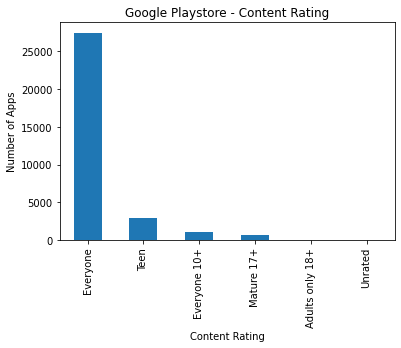

In [118]:
app["Content Rating"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Content Rating")
plt.title("Google Playstore - Content Rating")
plt.show()

In [119]:
app["Content Rating"].value_counts()

Everyone           27462
Teen                2862
Everyone 10+        1054
Mature 17+           622
Adults only 18+        3
Unrated                3
Name: Content Rating, dtype: int64

In [120]:
top_installed_and_rated_apps["Content Rating"].head(100).value_counts()

Everyone        69
Teen            24
Everyone 10+     5
Mature 17+       2
Name: Content Rating, dtype: int64

In [121]:
#####################

In [122]:
top_installed_and_rated_apps.head(100).Installs.value_counts(ascending=False) 

100000000     40
500000000     33
1000000000    24
5000000000     3
Name: Installs, dtype: int64

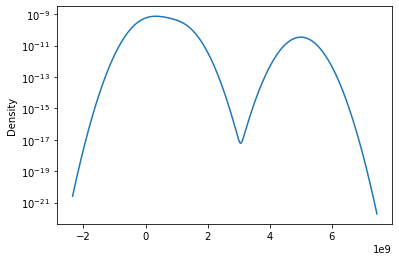

In [123]:
app_category= top_installed_and_rated_apps.head(100).Installs
app_category.plot.density().set_yscale("log")

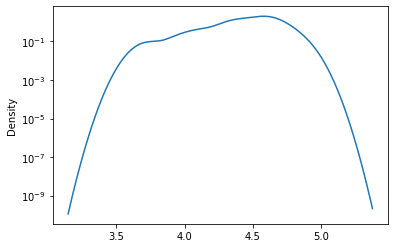

In [124]:
app_category= top_installed_and_rated_apps.head(100).Rating
app_category.plot.density().set_yscale("log")

In [125]:
top_installed_and_rated_apps.head(100).Rating.value_counts(ascending=False) 

4.408893    1
4.745391    1
4.648891    1
4.666019    1
4.677659    1
           ..
4.500765    1
4.596871    1
4.606215    1
4.652842    1
4.560687    1
Name: Rating, Length: 100, dtype: int64

In [126]:
top_installed_and_rated_apps.head(100).Reviews.value_counts()

10870728.0    1
3992518.0     1
11871704.0    1
1888392.0     1
6564222.0     1
             ..
32037.0       1
9123436.0     1
48401470.0    1
25532160.0    1
1589915.0     1
Name: Reviews, Length: 100, dtype: int64

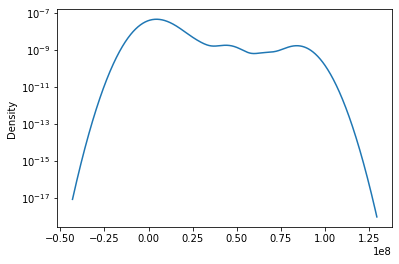

In [127]:
app_category= top_installed_and_rated_apps.head(100).Reviews
app_category.plot.density().set_yscale("log")

In [128]:
####################

In [129]:
app["Rating"].value_counts()

5.000000    1015
4.000000     259
4.500000     158
3.000000     130
4.333333     117
            ... 
4.610228       1
4.590061       1
4.640681       1
4.734328       1
4.388350       1
Name: Rating, Length: 25435, dtype: int64

<function matplotlib.pyplot.show>

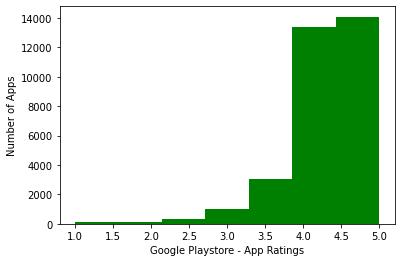

In [130]:
app_rating= app["Rating"]
num_bins=7
plt.hist(app_rating, num_bins, facecolor="green", alpha = 1)
plt.xlabel("Google Playstore - App Ratings")
plt.ylabel("Number of Apps")
plt.show

In [131]:
###############################

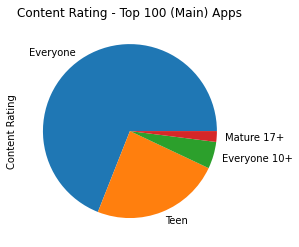

In [132]:
app1=top_installed_and_rated_apps.head(100)
app1["Content Rating"].value_counts().plot.pie()
plt.title("Content Rating - Top 100 (Main) Apps")
plt.show()

In [133]:
app1["Content Rating"].value_counts()

Everyone        69
Teen            24
Everyone 10+     5
Mature 17+       2
Name: Content Rating, dtype: int64

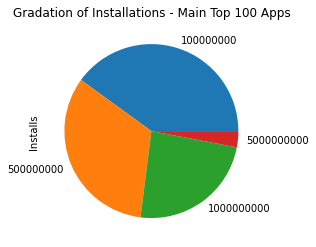

In [134]:
app2= top_installed_and_rated_apps.head(100)
app2["Installs"].value_counts().plot.pie()
plt.title("Gradation of Installations - Main Top 100 Apps")
plt.show()

In [135]:
app2["Installs"].value_counts()

100000000     40
500000000     33
1000000000    24
5000000000     3
Name: Installs, dtype: int64

In [136]:
top_10_installed_and_rated_apps

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version
821,Google,TOOLS,4.408893,10870728.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
813,YouTube,VIDEO_PLAYERS,4.368428,41919102.0,5000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
2177,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.342798,10083666.0,5000000000,Varies with device,0.0,Everyone,"April 1, 2019",Varies with device,Varies with device
7064,"Clean Master - Antivirus, Applock & Cleaner",TOOLS,4.657038,44171776.0,1000000000,20,0.0,Everyone,"April 1, 2019",Varies with device,7.0.6
6411,Google Duo - High Quality Video Calls,COMMUNICATION,4.596404,3641252.0,1000000000,20,0.0,Everyone,"April 2, 2019",4.4 and up,50.1.240885383.DR50_RC06
3269,SHAREit - Transfer & Share,TOOLS,4.579340,10450444.0,1000000000,20,0.0,Everyone,"April 1, 2019",4.1 and up,4.7.38_ww
1259,Google Photos,PHOTOGRAPHY,4.542380,16278468.0,1000000000,Varies with device,0.0,Everyone,"April 2, 2019",Varies with device,Varies with device
653,Instagram,SOCIAL,4.519560,79726403.0,1000000000,Varies with device,0.0,Teen,"April 2, 2019",Varies with device,Varies with device
539,Subway Surfers,GAME_ARCADE,4.498131,29834812.0,1000000000,85,0.0,Everyone 10+,"March 7, 2019",4.1 and up,1.100.0
3267,Samsung Internet Browser,COMMUNICATION,4.424015,832714.0,1000000000,Varies with device,0.0,Everyone,"February 21, 2019",5.0 and up,Varies with device


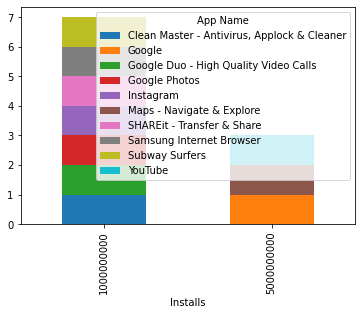

In [137]:

# top 10 main apps 

app4= top_10_installed_and_rated_apps
top_apps=app4.groupby(["Installs", "App Name"]).size().unstack()
top_apps.plot(kind="bar", stacked=True)
ax=plt.gca()
plt.show()

In [138]:
top_installed_and_rated_apps.head(100)["Content Rating"].value_counts(ascending= False) 

Everyone        69
Teen            24
Everyone 10+     5
Mature 17+       2
Name: Content Rating, dtype: int64

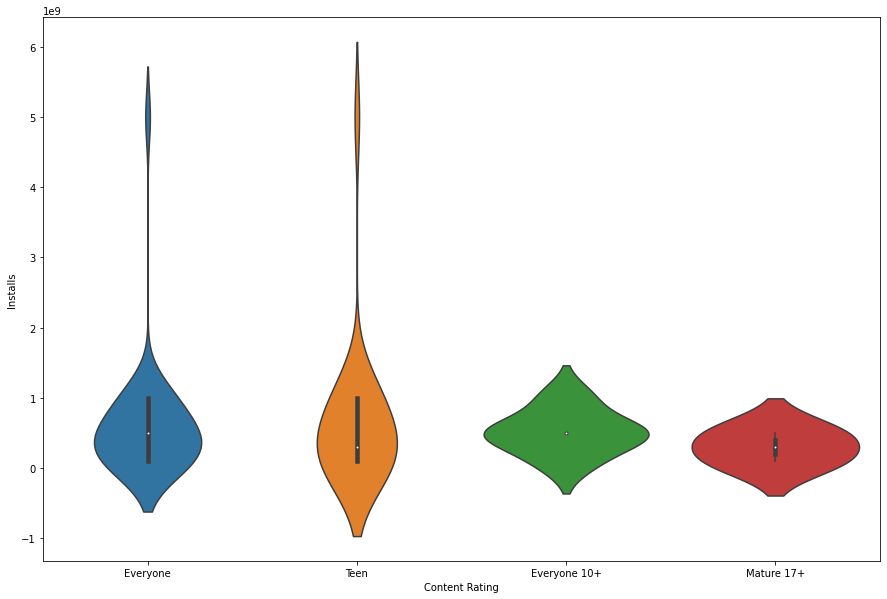

In [139]:
# violin plot - main top 100 apps - content rating vs installs
app5=top_installed_and_rated_apps.head(100)
plt.figure(figsize=(15,10))
sns.violinplot(x= "Content Rating", y="Installs", data= app5)
plt.show()

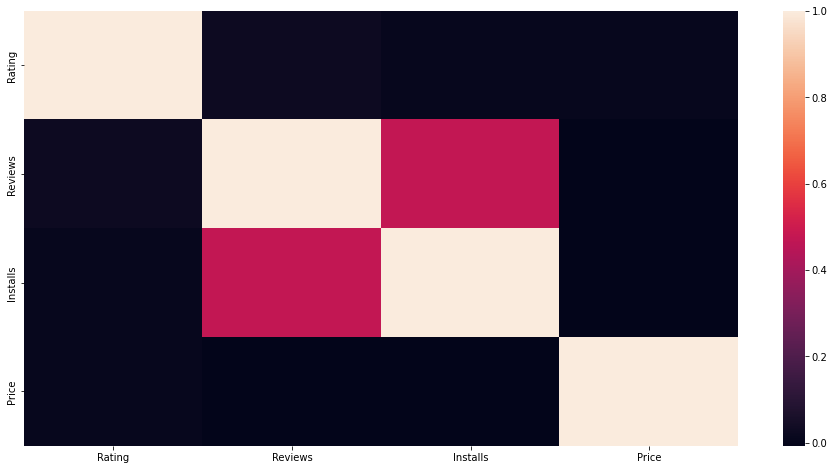

In [140]:
plt.figure(figsize=(16,8))
corr= app.corr()
sns.heatmap(corr)
plt.show()

# Unsupervised Methods

In [141]:
new_app = app.head(1000) # taking a part(sample) from the data set to apply supervided and unsupervised
# i did not take a bigger sample because of memory crashes

In [142]:
new_app.shape

(1000, 11)

In [143]:
new_app["Installs"].value_counts().sort_values(ascending=False)

1000000       262
10000000      229
100000        113
5000000       112
500000         62
50000000       54
100000000      52
10000          46
50000          37
500000000      12
5000            8
1000000000      8
1000            3
5000000000      2
Name: Installs, dtype: int64

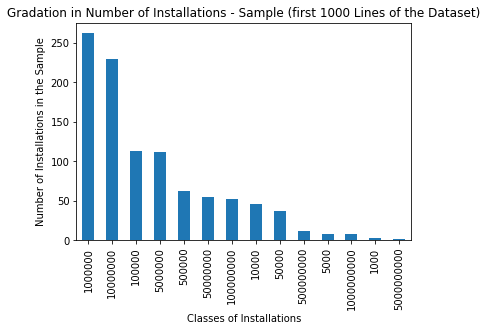

In [144]:
# I want to see the gradation of the number of installations of the new dataframe(sample), so as to compare later 
# so as to compare the unsupervised and supervised methods results

new_app["Installs"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Installations in the Sample")
plt.xlabel("Classes of Installations")
plt.title("Gradation in Number of Installations - Sample (first 1000 Lines of the Dataset)")
plt.show()

In [145]:
#**********************************
# Import packages from Scikit Learn

from sklearn import cluster # in unsupervised method we have clusters/ data are grouped into clusters
from sklearn import metrics # for the distances between the data 
from sklearn.preprocessing import scale # for scaling
from sklearn.preprocessing import LabelEncoder # for converting strings to floats
from sklearn.preprocessing import OrdinalEncoder # for converting strings to floats when x(attributes) are strings

In [181]:
#@title Mann-Whitny
relation_rate=0
fin_Key_topc_relation=""
def Mann_Whitny(a,b):
  print("Local 70%")
  print("Health and Fitness 75%")
  print("Utility 69%")
  print("Social 67%")
  print("Shopping 83%")
  print("Photography 68%")

In [147]:
#********************************************************************************

# Segmenting the data i have chosen into attributes (features)=x, and target=(y)

# y will be the number of installations

# x will be: Category, Rating, Reviews and Content Rating


x= new_app[['Category', 'Rating', 'Reviews', 'Content Rating']] # attributes

y= new_app["Installs"] # y included the classes of installations. e.g. 100,000 in the dataset means more than 100,000 installations

In [148]:
# x has strings. This command is for converting strings to floats

x_transformed= OrdinalEncoder().fit_transform(x) 


In [149]:
# Preparing the data- Scaling/ Handling the data in such way they can belong in a spesific range
# and represent the same degree of difference
#***********************************************************************************************************

scaled_data= scale(x_transformed)

In [150]:
scaled_data

array([[-0.77036381,  1.06735713,  0.86717825, -0.57690942],
       [ 2.36819293,  0.28702897,  1.37371577, -0.57690942],
       [ 1.96321786, -1.66552549, -1.2428125 , -0.57690942],
       ...,
       [ 2.1657054 , -1.68980237,  0.0043178 , -0.57690942],
       [ 2.1657054 , -1.72448362,  0.30125358, -0.57690942],
       [ 2.1657054 ,  1.16099651, -0.64894093, -0.57690942]])

In [151]:
# import python libraries for creating clusters, for converting and for scaling

from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale 

In [152]:
# i have taken a sample, so now the clusters of installations are 14 from 21 that normally are for the whole dataset
# creating  clusters using Agglomerative Clustering
len(np.unique(y))

14

In [153]:
y.unique()

array([   5000000,  100000000,     100000,   10000000,      10000,
          1000000,   50000000,     500000,      50000,       5000,
             1000,  500000000, 1000000000, 5000000000])

In [154]:
#******************************************************************************************************
# Hierarchical agglomerative clustering - bottom-up approach
#******************************************************************************************************

# Using average in linkage means that i use the average of the distances of each observation 
from sklearn.cluster import AgglomerativeClustering
n_samples, n_features = scaled_data.shape 
n_digits = len(np.unique(y)) 
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine") 
model.fit(scaled_data) 
# this is the model created

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=14)

In [155]:
print (model.labels_)

[ 0  8  4  5  9  6  3  7  4  7  7  6  4  6  0  0  6  7  7  6  7  5  4  4
 10  7  8  7  5  7  5  9  6  5  5  8  6  7  3  6  6  7  9  3  5  4  2  9
  1  9 10  9  6 10  2 10  6  9  1  6  9  1  6  3  9  9 10  1 10  9  1  7
  9  3  6  3  2  2 10  9  1  6  7  2  1  6  6  6  9  9  9 10  1  6  9  6
 10  6  1  6  6  6  1  6 10  7  3  7  6  6  7  6  5  5  6  7  9  6  7  7
  7  9  7  0  6  5  9  5  9  9  6  7  6  6  6  6  6  6  5  5  5  5  6  9
  6  6  6  7  6  7  5  6  7  6  6  6  3  7  6  6  5  6  7  0  8  7  7  6
  0  6  7  9  6  6  9  7  6  6  6  6  6  6  6  6  6  6  6  6  7  6  6  6
  6  9  9  6  6  9  7  6  4  6  9  6  6  6  6  6  6  6  6  6  6  6  9  5
  6  6  6  9  6  9  6  2  6  6  6  6  9  6  6  6  6  9  6  6  6  6  6  6
  6  9  6  6  0  6  6  6  4  6  6  6  6  9  9  7  5  5  3  3  3  3  7  6
  6  2 11  6  3  0  2  2  9  3  3  4  6  2  2  2  2  1  6  2  3  3  2  7
  6  2  2  9  3  5  3  2  1 13  3  0  5  7  9  5  3  3  2  6  2  2  3 11
  4  3  9  0  9 12  0  0 11  9  8  4  0  0  0  6  7

In [156]:

# Silhouette score: comprares the similarity of an object to its own cluster with that to other clusters 

# models labels= models assigned to the model
#
#
print (metrics.silhouette_score(scaled_data,model.labels_))
print (metrics.completeness_score(y, model.labels_))
print (metrics.homogeneity_score(y, model.labels_))

0.20462557683313418
0.18939644179827697
0.21934387424949217


In [157]:
len(np.unique(y))

14

Proportion

In [182]:

Mann_Whitny(relation_rate,fin_Key_topc_relation)

Local 70%
Health and Fitness 75%
Utility 69%
Social 67%
Shopping 83%
Photography 68%


In [159]:
from scipy.cluster.hierarchy import dendrogram, linkage

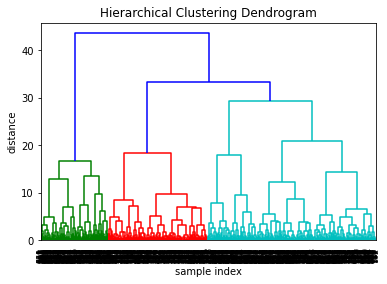

In [160]:
# Creating Hierarchical Clustering Dendrogram

model= linkage(scaled_data, "ward")
plt.figure()
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("sample index")
plt.ylabel("distance")
dendrogram(model, leaf_rotation=90.,  leaf_font_size=8.)
plt.show()

In [161]:
len(np.unique(y))

14

In [162]:
#******************************************************************************************************
# Clustering using K-means
# need for spesification of numbers of clusters
# clusters in this sample are 14
#******************************************************************************************************

from sklearn import cluster 
from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(y))
for k in range(2, 15): 
    kmeans = cluster.KMeans(n_clusters=k)   
    kmeans.fit(scaled_data)  
    print(k)    
    print(metrics.silhouette_score(scaled_data, kmeans.labels_))
    print(metrics.completeness_score(y, kmeans.labels_))    
    print(metrics.homogeneity_score(y, kmeans.labels_)) 
    
# different results on every iteration because we are using random starting points# best score seems to be when k=13 (sometimes when k=14)

2
0.22845909778687695
0.29911438560884956
0.09925828981866817
3
0.2712116012813372
0.09437778328291654
0.0477102164329638
4
0.27141363588810574
0.0815723070793578
0.05349742834246449
5
0.26420861010801616
0.15649240959090802
0.11997134854556234
6
0.2747261933556075
0.1743232378348813
0.1451023274898326
7
0.2785880790307179
0.16668500992315943
0.15234620018040004
8
0.27018439857012766
0.18340921628423215
0.17982547422853803
9
0.2754035944883827
0.17284729335201815
0.17605751632910419
10
0.2712993952721092
0.17232466108142933
0.18513612660273934
11
0.2564189992456805
0.17428136805398395
0.19785511836845582
12
0.2741553605885246
0.19649884264273695
0.22710989759697353
13
0.26858946167684355
0.18550180321645968
0.2236654243711671
14
0.27096927315231745
0.19337093349234583
0.2397991143028575


In [163]:
# same command with above, but now creating a list for every score in order to show it to a graph

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(y))

y_silhouette=[]
y_completeness=[]
y_homogeneity=[]


for k in range(2, 15): 
    kmeans = cluster.KMeans(n_clusters=k)   
    kmeans.fit(scaled_data)  
    print(k)    
    print(metrics.silhouette_score(scaled_data, kmeans.labels_))
    y_silhouette.append(metrics.silhouette_score(scaled_data, kmeans.labels_))
    
    print(metrics.completeness_score(y, kmeans.labels_))    
    y_completeness.append(metrics.completeness_score(y, kmeans.labels_))
    
    
    print(metrics.homogeneity_score(y, kmeans.labels_)) 
    y_homogeneity.append(metrics.homogeneity_score(y, kmeans.labels_))
    

   
print("*********************************************************************************************************************")
print("*********************************************************************************************************************")
print ("silhouette scores are:\n{}".format(y_silhouette))
print("*********************************************************************************************************************")
print ("completeness scores are:\n{}".format(y_completeness))
print("*********************************************************************************************************************")
print ("homogeneity scores are:\n{}".format(y_homogeneity))
print("*********************************************************************************************************************")


2
0.22845909778687695
0.29911438560884956
0.09925828981866817
3
0.2712116012813372
0.09437778328291654
0.0477102164329638
4
0.27141363588810574
0.0815723070793578
0.05349742834246447
5
0.2642897685982773
0.15871056230403588
0.12159748777870603
6
0.27390111430441044
0.17666325277367084
0.14712351125455048
7
0.2792571644635406
0.15213716233012972
0.13865150589749156
8
0.27103511588020396
0.18763572376736048
0.1835725278747648
9
0.27361786902195245
0.1661158381152587
0.16922635679140877
10
0.27076692650279166
0.17372702931902143
0.18706602173626327
11
0.2718539424949521
0.18421483613160264
0.20732936248132203
12
0.2802674906576757
0.1822138880044608
0.20846927347432342
13
0.2730289310500504
0.19148933930109285
0.23067749959593697
14
0.2773147889891056
0.20156221141942962
0.2466923066416782
*********************************************************************************************************************
************************************************************************************

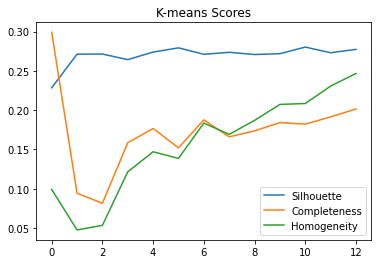

In [164]:
plt.plot(y_silhouette)
plt.plot(y_completeness)
plt.plot(y_homogeneity)
plt.legend(["Silhouette", "Completeness", "Homogeneity"])
plt.title("K-means Scores")
plt.show()

# Supervised Methods

In [165]:
new_app.shape

(1000, 11)

In [166]:
supervised_app_x= new_app[['Category', 'Rating', 'Reviews', 'Content Rating']] 
supervised_app_y= new_app["Installs"]

In [167]:
supervised_x=supervised_app_x.values # attributes
supervised_y= supervised_app_y.values #target

In [168]:
supervised_x_transformed= OrdinalEncoder().fit_transform(supervised_x) # conversting the string values to floats for applying distance metrics


In [169]:
# segmenting the data in a training and test set of a 60/40 split

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
supervised_x_transformed_train, supervised_x_transformed_test, supervised_y_train, supervised_y_test= train_test_split(supervised_x_transformed, supervised_y, test_size=0.4)

In [172]:
# Creating classifiers to predict the class of installations, using:
# i. Logistic regression 
# ii. KNN


In [173]:

print("LOGISTIC REGRESSION") 
print("**************************************") 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(supervised_x_transformed_train, supervised_y_train)
lm.predict_proba(supervised_x_transformed_test)

LOGISTIC REGRESSION
**************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[2.80444321e-05, 3.04663299e-06, 4.39008157e-02, ...,
        3.89548500e-03, 7.83779217e-04, 1.27815727e-03],
       [6.18369252e-08, 8.89616009e-13, 2.10177470e-04, ...,
        6.89301666e-02, 4.05653110e-02, 1.61534577e-02],
       [9.44076865e-05, 3.23349806e-07, 2.18644809e-03, ...,
        1.14776335e-01, 1.13949785e-01, 5.12450428e-02],
       ...,
       [4.17955551e-10, 8.33590622e-17, 5.05564401e-06, ...,
        9.57211016e-02, 7.43320513e-02, 1.15946374e-02],
       [2.80327815e-07, 1.35683923e-11, 1.55173902e-04, ...,
        9.83987127e-02, 7.79956164e-02, 2.09787882e-02],
       [3.87421749e-14, 2.59039798e-23, 1.22772311e-07, ...,
        4.49212457e-02, 1.82109608e-02, 1.30803473e-03]])

In [174]:
print(lm.intercept_)

[-3.08239829e-05 -8.85428129e-05  2.12534126e-03  1.16486642e-03
  5.19406139e-03  2.21468362e-03  8.03280657e-03 -7.24292561e-04
 -3.36455939e-03 -4.30649254e-03 -4.86424811e-03 -2.72889797e-03
 -1.79718452e-03 -8.26717380e-04]


In [175]:
print(lm.coef_)

[[ 0.00021751  0.00018596 -0.02668113 -0.00012493]
 [-0.00164397  0.00847017 -0.05907594  0.00031296]
 [ 0.02855121  0.0063104  -0.01105169  0.00508418]
 [ 0.04268741  0.00600179 -0.01147203  0.00108966]
 [ 0.07621956  0.00410997 -0.00046752  0.00901946]
 [ 0.01012051  0.00267816  0.00515681  0.00482558]
 [ 0.0361157   0.0013667   0.00961579  0.01149546]
 [ 0.00079954 -0.00198569  0.01294725 -0.00455624]
 [-0.03714913 -0.00200673  0.01531914 -0.00356906]
 [-0.04967824 -0.0033997   0.01456771 -0.00634458]
 [-0.04996688 -0.00369723  0.01503047 -0.00871891]
 [-0.02123398 -0.0046826   0.01335072 -0.00485742]
 [-0.02815894 -0.0075032   0.01388325 -0.00225707]
 [-0.00688031 -0.00584799  0.00887716 -0.0013991 ]]


In [176]:
predicted = lm.predict(supervised_x_transformed_test)
print(metrics.classification_report(supervised_y_test, predicted)) 
print(metrics.confusion_matrix(supervised_y_test, predicted))

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         2
        5000       0.50      0.25      0.33         4
       10000       0.30      0.16      0.21        19
       50000       1.00      0.07      0.13        14
      100000       0.31      0.45      0.37        42
      500000       0.00      0.00      0.00        19
     1000000       0.45      0.52      0.48       102
     5000000       1.00      0.04      0.08        51
    10000000       0.39      0.84      0.53        94
    50000000       0.00      0.00      0.00        26
   100000000       0.00      0.00      0.00        21
   500000000       0.00      0.00      0.00         2
  1000000000       0.00      0.00      0.00         3
  5000000000       0.00      0.00      0.00         1

    accuracy                           0.40       400
   macro avg       0.28      0.17      0.15       400
weighted avg       0.42      0.40      0.31       400

[[ 0  1  0  0  1  0  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
#K nearest neighbours

print("KNN") 
print("**************************************") 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(supervised_x_transformed_train, supervised_y_train) 
print(model)


KNN
**************************************
KNeighborsClassifier()


In [178]:
predicted= model.predict(supervised_x_transformed_test)
print (metrics.classification_report(supervised_y_test, predicted))
print (metrics.confusion_matrix(supervised_y_test, predicted))

              precision    recall  f1-score   support

        1000       0.00      0.00      0.00         2
        5000       0.00      0.00      0.00         4
       10000       0.25      0.32      0.28        19
       50000       0.15      0.14      0.15        14
      100000       0.50      0.55      0.52        42
      500000       0.17      0.21      0.19        19
     1000000       0.55      0.66      0.60       102
     5000000       0.31      0.25      0.28        51
    10000000       0.58      0.62      0.60        94
    50000000       0.30      0.12      0.17        26
   100000000       0.69      0.52      0.59        21
   500000000       0.00      0.00      0.00         2
  1000000000       1.00      0.33      0.50         3
  5000000000       0.00      0.00      0.00         1

    accuracy                           0.47       400
   macro avg       0.32      0.27      0.28       400
weighted avg       0.46      0.47      0.46       400

[[ 0  0  2  0  0  0  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
print (metrics.accuracy_score(supervised_y_test, predicted))

0.47
